In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline

Using TensorFlow backend.


In [2]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
# encode wine type labels
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:5], train_labels_enc[0:5])

['cat', 'dog', 'cat', 'dog', 'dog'] [0 1 0 1 1]


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


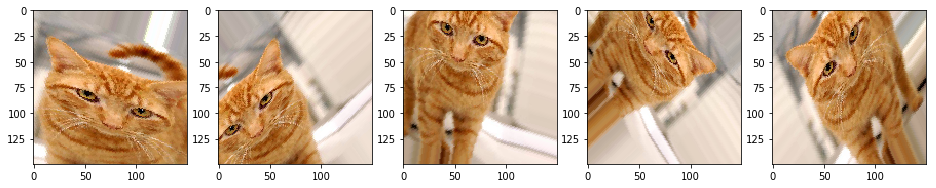

In [5]:
img_id = 2595
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


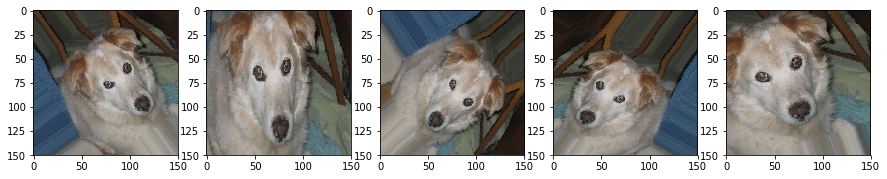

In [6]:
img_id = 1991
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [7]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

input_shape = (150, 150, 3)

In [8]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [9]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 12s - loss: 0.6924 - acc: 0.5113 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 11s - loss: 0.6855 - acc: 0.5490 - val_loss: 0.6711 - val_acc: 0.5780
Epoch 3/100
100/100 [==============================] - 11s - loss: 0.6691 - acc: 0.5920 - val_loss: 0.6642 - val_acc: 0.5950
Epoch 4/100
100/100 [==============================] - 11s - loss: 0.6586 - acc: 0.5993 - val_loss: 0.6594 - val_acc: 0.5890
Epoch 5/100
100/100 [==============================] - 11s - loss: 0.6454 - acc: 0.6083 - val_loss: 0.6367 - val_acc: 0.6370
Epoch 6/100
100/100 [==============================] - 11s - loss: 0.6470 - acc: 0.6150 - val_loss: 0.6375 - val_acc: 0.6160
Epoch 7/100
100/100 [==============================] - 11s - loss: 0.6345 - acc: 0.6310 - val_loss: 0.6197 - val_acc: 0.6730
Epoch 8/100
100/100 [==============================] - 11s - loss: 0.6206 - acc: 0.6527 - val_loss: 0.6072 - val_acc: 0.6630


100/100 [==============================] - 11s - loss: 0.4325 - acc: 0.8027 - val_loss: 0.4124 - val_acc: 0.8140
Epoch 67/100
100/100 [==============================] - 11s - loss: 0.4153 - acc: 0.8147 - val_loss: 0.4447 - val_acc: 0.8000
Epoch 68/100
100/100 [==============================] - 11s - loss: 0.4326 - acc: 0.7910 - val_loss: 0.4010 - val_acc: 0.8220
Epoch 69/100
100/100 [==============================] - 11s - loss: 0.4115 - acc: 0.8163 - val_loss: 0.4746 - val_acc: 0.8080
Epoch 70/100
100/100 [==============================] - 11s - loss: 0.4180 - acc: 0.8113 - val_loss: 0.4435 - val_acc: 0.8140
Epoch 71/100
100/100 [==============================] - 11s - loss: 0.4082 - acc: 0.8107 - val_loss: 0.4094 - val_acc: 0.8210
Epoch 72/100
100/100 [==============================] - 11s - loss: 0.4053 - acc: 0.8047 - val_loss: 0.4502 - val_acc: 0.7960
Epoch 73/100
100/100 [==============================] - 11s - loss: 0.4076 - acc: 0.8163 - val_loss: 0.3862 - val_acc: 0.8340
Epoch

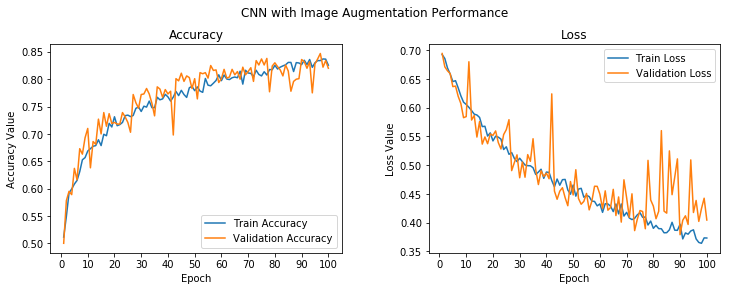

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [13]:
model.save('cats_dogs_cnn_img_aug.h5')